# sub-problems
Splitting up the centralized problem into sub-problems.

In [1]:
from itertools import combinations

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy.signal import savgol_filter

In [2]:
%matplotlib ipympl
plt.rcParams['axes.grid'] = True

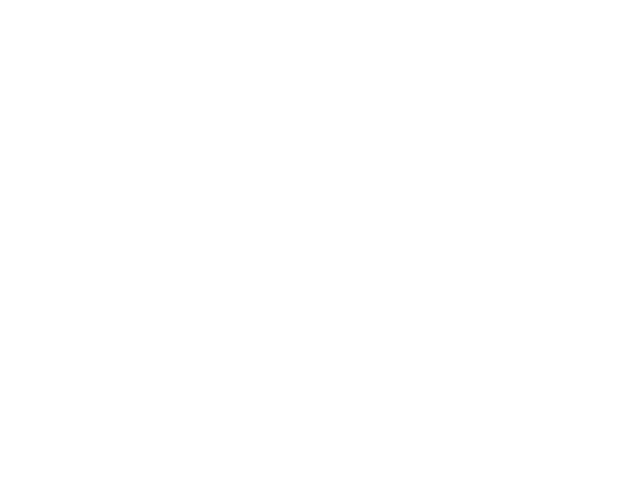

In [3]:
f1 = plt.figure()

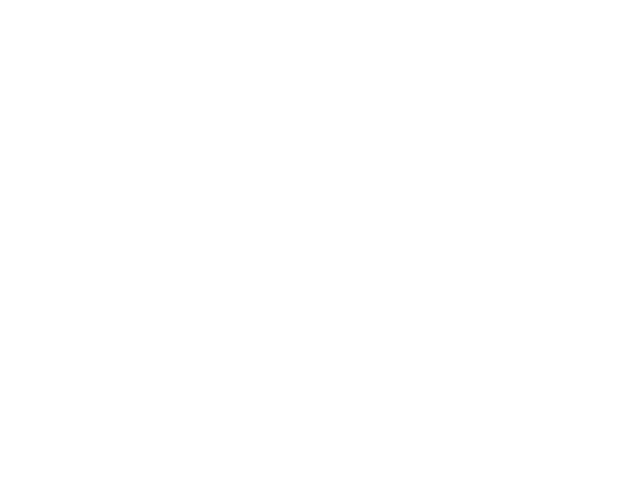

In [4]:
f2 = plt.figure()

## simulate brownian motion over a horizon

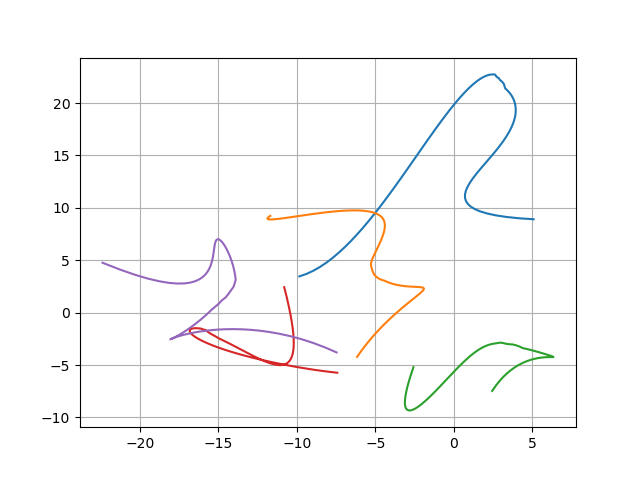

In [5]:
N = 100
var = 1.0
init_var = 25.0
n_agents = 5
t = np.arange(N)

traj_init = init_var * (np.random.rand(1, 2, n_agents) - 0.5)
traj_offsets = var * np.random.randn(N, 2, n_agents)
trajs = traj_init + np.cumsum(traj_offsets, axis=0)
trajs = savgol_filter(trajs, 91, 5, axis=0)

plt.clf()
plt.figure(f1, clear=True)
plt.plot(trajs[:,0], trajs[:,1])
plt.show()

In [10]:
# Compute the relative distances between each pair of agents.
pair_inds = np.array(list(combinations(range(n_agents), 2)))
rel_dists = np.linalg.norm(trajs[...,pair_inds[:,0]] - trajs[...,pair_inds[:,1]], axis=1)
n_pairs = len(pair_inds)

# Navigate the full trajectory with smaller RHC windows.
horizon = 10
# Assume symmetric planning and collision radii to define the sub problems.
planning_radii = 10
collision_radii = 4

pair_masks = np.zeros((N, n_pairs), dtype=bool)
for t in range(N):
    pair_masks[t] = np.any(rel_dists[t:t+horizon] < planning_radii, axis=0)

In [8]:
n_horizons = N // horizon
pair_masks = np.zeros((n_horizons, n_pairs), dtype=bool)
for t in range(n_horizons):
    pair_masks[t] = np.any(rel_dists[t:t+horizon] < planning_radii, axis=0)

NameError: name 'n_horizon' is not defined

In [11]:
pair_masks.astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0,

In [7]:
# Animate the full trajectory with shifting horizons.
def animate(t):
    """Render the current time step."""
    
    ax = plt.gca()
    plt.cla()
    plt.axis([trajs[:,0].min(), trajs[:,0].max(), trajs[:,1].min(), trajs[:,1].max()])
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_aspect("equal")

    ax.plot(trajs[:t+1,0], trajs[:t+1,1], lw=2)
    for i, pair in enumerate(pair_inds):
        if pair_masks[t, i]:
            ax.plot(trajs[t,0,pair], trajs[t,1,pair], 'k--')
    
    if planning_radii:
        for i in range(n_agents):
            ax.add_artist(plt.Circle(
                        (trajs[t,0,i], trajs[t,1,i]), planning_radii, 
                        color='k', fill=True, alpha=0.1, lw=2
            ))
            ax.add_artist(plt.Circle(
                        (trajs[t,0,i], trajs[t,1,i]), collision_radii, 
                        color='r', fill=True, alpha=0.1, lw=2
            ))

In [8]:
# Spotcheck the first frame.
plt.figure(f1, clear=True)
animate(10)

In [9]:
plt.figure(f2, clear=True)
anim = FuncAnimation(f2, animate, frames=range(1,N))
anim.save(f"{n_agents}-agents.gif", fps=5)

MovieWriter ffmpeg unavailable; using Pillow instead.


### How to Initialize Tracks?
1. Start with the decoupled solution?
1. Always roll out control inputs regardless